In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [2]:
%matplotlib inline

In [3]:
%pwd

'C:\\Users\\Administrator\\Desktop\\code\\python-data-processing\\ch8'

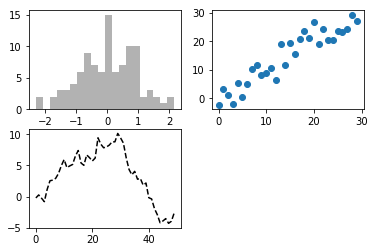

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(randn(50).cumsum(),'k--')
_ = ax1.hist(randn(100), bins=20,  color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30)+3*randn(30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000098B9A58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000009B21668>]], dtype=object)

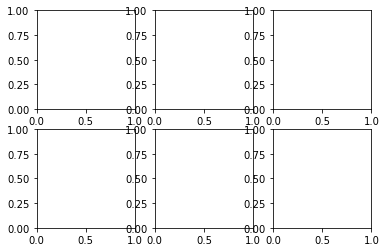

In [5]:
fig, axes = plt.subplots(2, 3)
axes

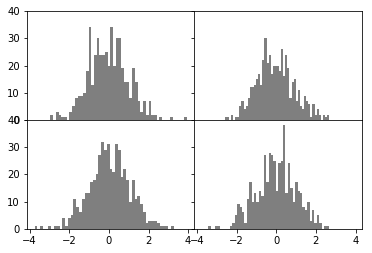

In [6]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)

plt.subplots_adjust(wspace=0, hspace=0) #adjust margin is 0

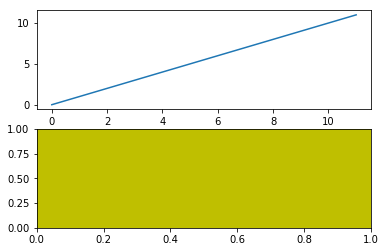

In [7]:
plt.plot([1,2,3])
plt.subplot(211)
plt.plot(range(12))
plt.subplot(212, facecolor='y')

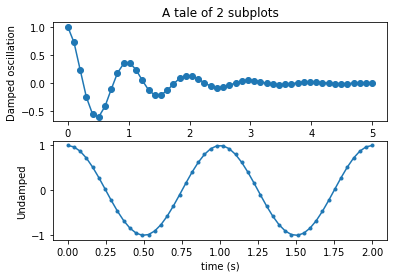

In [8]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

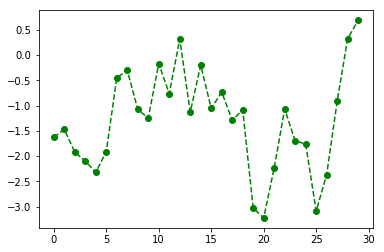

In [9]:
plt.figure()
plt.plot(randn(30).cumsum(), 'go--')

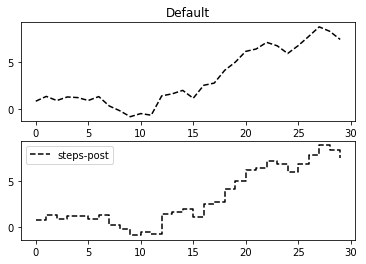

In [10]:
data = np.random.randn(30).cumsum()
plt.subplot(2,1,1)
plt.plot(data, 'k--', label='Default')
plt.title('Default')

plt.subplot(2,1,2)
plt.plot(data, 'k--',drawstyle='steps-post',label='steps-post')
plt.legend(loc='best')


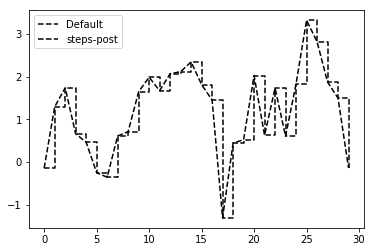

In [11]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k--',drawstyle='steps-post',label='steps-post')
plt.legend(loc='best')

### Ticks, labels, and legends

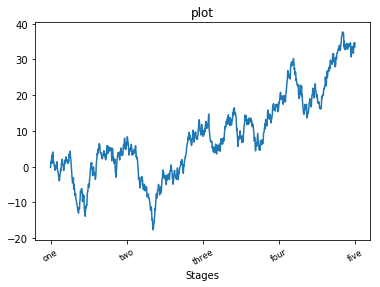

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                           rotation=30,fontsize='small')
ax.set_title('plot')
ax.set_xlabel('Stages')

### legend

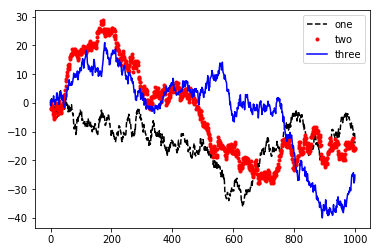

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k--', label='one')
ax.plot(randn(1000).cumsum(), 'r.', label='two')
ax.plot(randn(1000).cumsum(), 'b', label='three')
ax.legend(loc='best')

### annotation

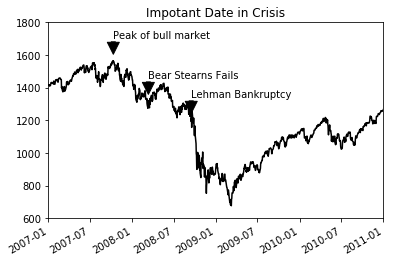

In [23]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv('C:/Users/Administrator/Desktop/reference/pydata-book-master/ch08/spx.csv',index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax = ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')
    
#zoom in on 2007-2010
ax.set_xlim(['1/1/2007','1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Impotant Date in Crisis')

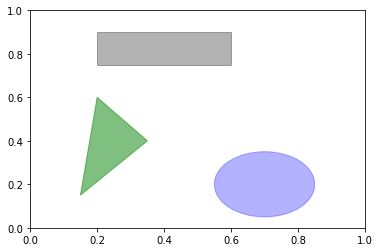

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## Plotting functions in pandas

### line plot

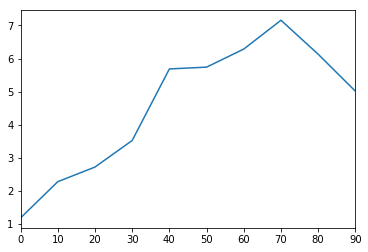

In [25]:
plt.close('all')
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

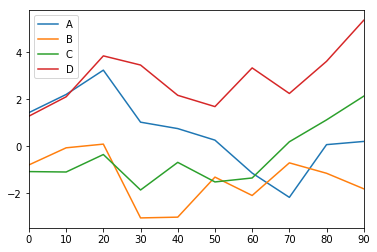

In [26]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot()

### bar plot

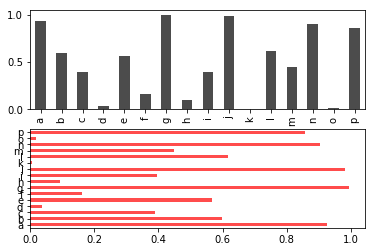

In [28]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='r', alpha=0.7)

In [29]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.815522,0.984996,0.789212,0.984949
two,0.359175,0.264507,0.373024,0.254887
three,0.950684,0.696543,0.462334,0.902073
four,0.693608,0.028276,0.981006,0.988238
five,0.283653,0.952790,0.391232,0.160211
six,0.524785,0.214279,0.689300,0.820608


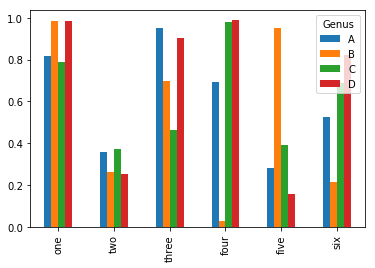

In [30]:
df.plot(kind='bar')

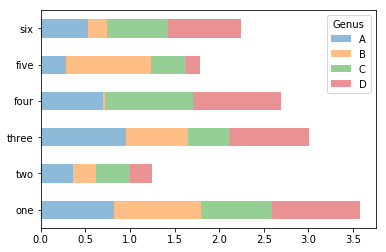

In [31]:
df.plot(kind='barh', stacked=True, alpha=0.5) #every row stacked a line

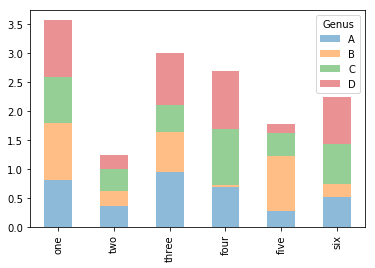

In [32]:
df.plot(kind='bar', stacked=True, alpha=0.5) 

In [41]:
tips = pd.read_csv('C:/Users/Administrator/Desktop/reference/pydata-book-master/ch08/tips.csv')
tips[:5]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [43]:
party_counts = pd.crosstab(tips.day, tips.size)
party_counts

col_0,1708
day,
Fri,19
Sat,87
Sun,76
Thur,62


### Histograms and density plots

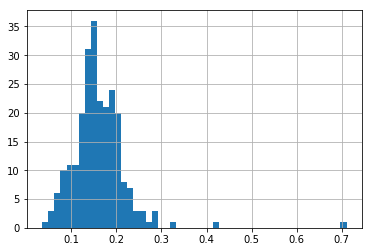

In [46]:
plt.close('all')
plt.figure()
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

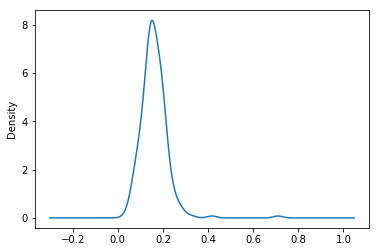

In [47]:
tips['tip_pct'].plot(kind='kde')

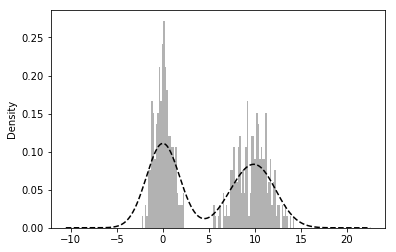

In [48]:
comp1 = np.random.normal(0, 1, size=200)  # N(0, 1)
comp2 = np.random.normal(10, 2, size=200)  # N(10, 4)
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

### Scatter plots

In [49]:
macro = pd.read_csv('C:/Users/Administrator/Desktop/reference/pydata-book-master/ch08/macrodata.csv')
macro[:5]

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [50]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[:5]

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


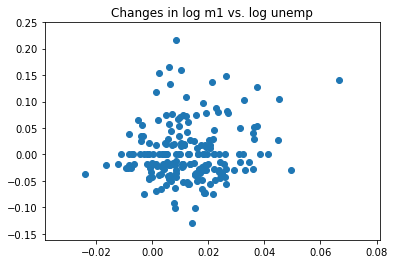

In [51]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E98D828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000F5BF710>]], dtype=object)

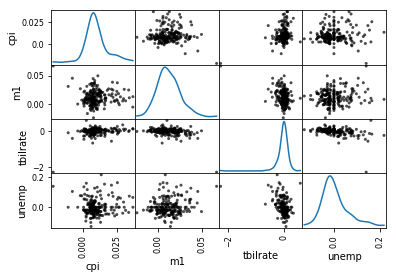

In [53]:
pd.plotting.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.7)